# Question A

## What automated approaches can you use?

For automated approaches to data quality assessment, you can use several methods:

#### Checking for Missing Values: 

    Automatically scan datasets to identify and handle missing data points.

#### Identifying Data Type Inconsistencies:

    Employ algorithms to detect fields that do not conform to expected data types.

#### Outlier Detection:

    Implement statistical methods to identify and possibly rectify data points that deviate significantly from the norm.

#### Treatment Statistical Methods:

    Apply automated techniques to correct issues such as outliers or inconsistencies, enhancing overall data quality.

Automating these processes reduces the need for manual decision-making and expedites the data cleaning and preparation phase, ensuring data quality efficiently and effectively.

# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading File

In [3]:
file_path = "E:\VamStar\AA.csv"
data = pd.read_csv(file_path)
data.head()

,contract_id,published_date,start_date,duration_extension,outcome,second_place_outcome,buyer,region,atc,duration,...,maximum_price_allowed,active_ingredient,pack_strength,participants,participants_price,published_date_month,winner,winner_price,second_place,second_place_price
0,1,5/16/2013,5/24/2013,10,won,NaN,buyer_1,region_1,C07AB07,39,...,0.10000,molecule_x,10mg,participants_16,0.0004,5/1/2013,participants_16,0.00040,NaN,NaN
1,2,4/29/2013,6/21/2013,0,won,NaN,buyer_2,region_2,C07AB07,48,...,63442.21000,molecule_x,10mg,participants_16,0.007,4/1/2013,participants_16,0.00700,NaN,NaN
2,3,6/9/2013,8/14/2014,6,won,lost,buyer_3,region_3,C07AB07,12,...,0.11635,molecule_x,10mg,participants_16|participants_23,0.014|0.07071,6/1/2013,participants_16,0.01400,participants_23,0.07071
3,4,5/4/2013,5/17/2013,19,won,NaN,buyer_4,region_4,C07AB07,36,...,0.03000,molecule_x,10mg,participants_16,0.025,5/1/2013,participants_16,0.02500,NaN,NaN
4,5,12/18/2013,12/17/2013,6,won,NaN,buyer_5,region_5,C07AB07,36,...,0.00010,molecule_x,10mg,participants_16,1.00E-05,12/1/2013,participants_16,0.00001,NaN,NaN


# Data Understanding

In [6]:
 # data types
print("Original data types:")
print(data.dtypes)

Original data types:
contract_id                int64
published_date            object
start_date                object
duration_extension         int64
outcome                   object
second_place_outcome      object
buyer                     object
region                    object
atc                       object
duration                   int64
contract_type             object
sku                       object
end_date_extension        object
participants_no            int64
quantity_annual            int64
quantity_total           float64
maximum_price_allowed    float64
active_ingredient         object
pack_strength             object
participants              object
participants_price        object
published_date_month      object
winner                    object
winner_price             float64
second_place              object
second_place_price       float64
dtype: object


In [7]:
print("Initial data info:")
print(data['winner_price'].describe())

Initial data info:
count    31.000000
mean      0.016300
std       0.011421
min       0.000010
25%       0.012250
50%       0.016990
75%       0.020000
max       0.050000
Name: winner_price, dtype: float64


> ## Missing Values

In [4]:
print("Missing values count:", data['winner_price'].isna().sum())

Missing values count: 0


>## Duplicate Values

In [9]:
duplicate_count = data.duplicated().sum()
print("Duplicate values count:", duplicate_count)

Duplicate values count: 0


# EDA Techniques

>## Finding Outlier

>>  ### Using BoxPlot

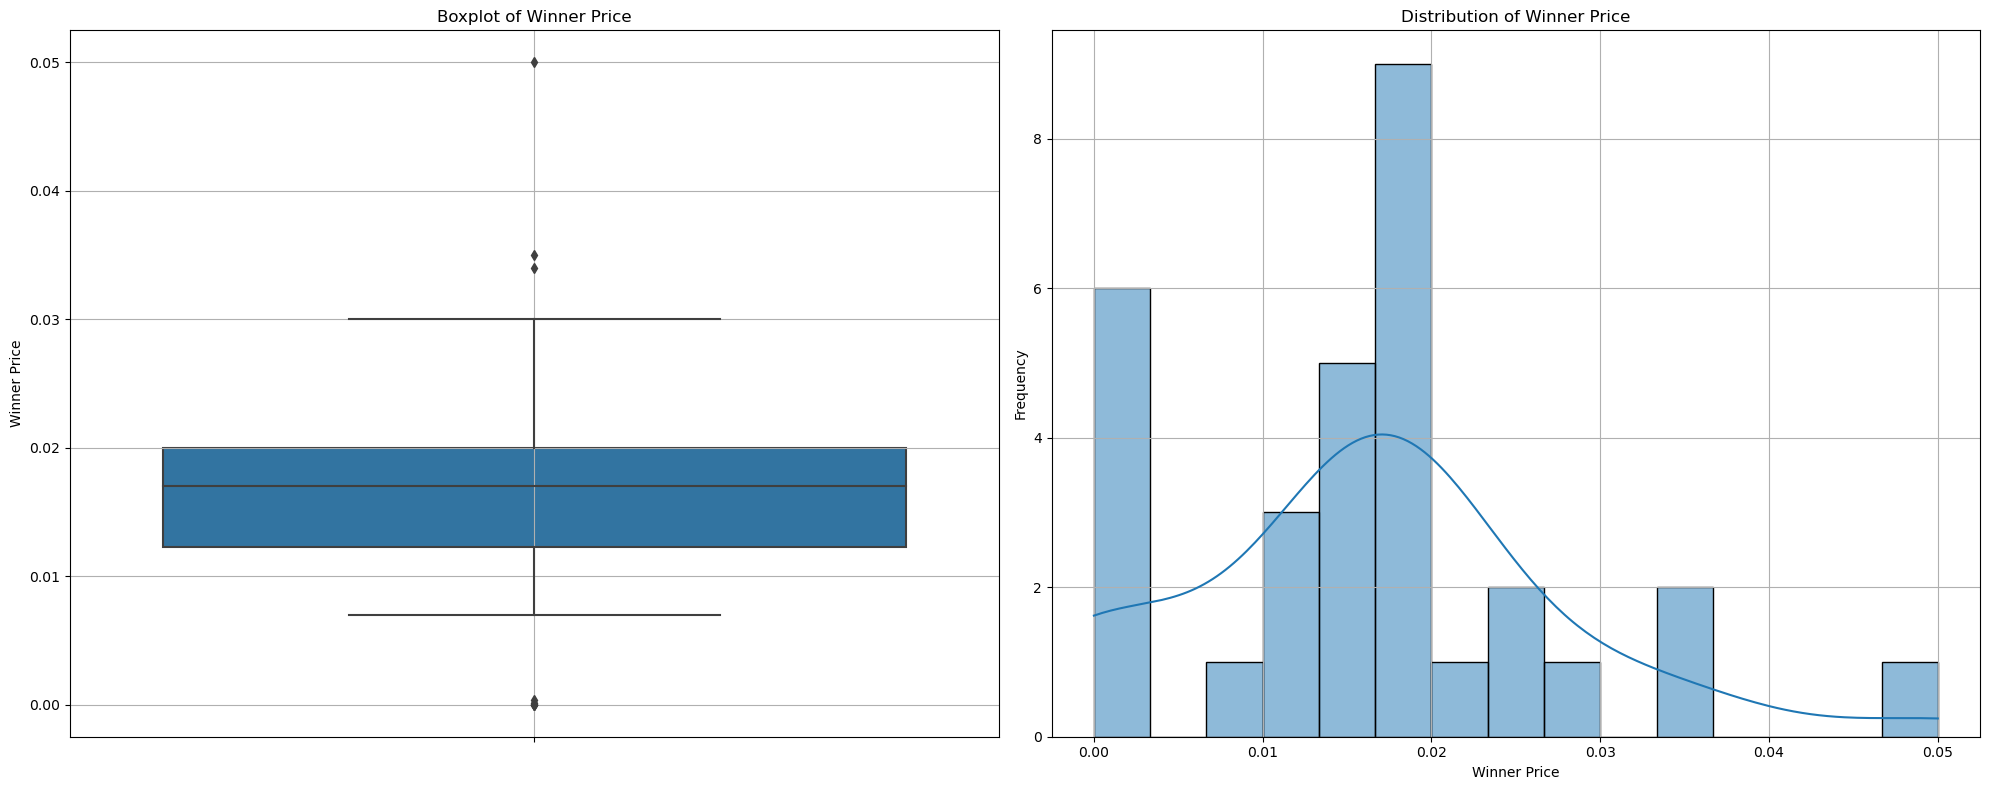

In [10]:

plt.figure(figsize=(20, 8))  # Increased size to make each subplot 

# First subplot: Boxplot
plt.subplot(1, 2, 1)  
sns.boxplot(y=data['winner_price'])
plt.title('Boxplot of Winner Price')
plt.ylabel('Winner Price')
plt.grid(True)

# Second subplot: Histogram with KDE
plt.subplot(1, 2, 2) 
sns.histplot(data['winner_price'], kde=True, bins=15)
plt.title('Distribution of Winner Price')
plt.xlabel('Winner Price')
plt.ylabel('Frequency')
plt.grid(True)

# Show the entire figure with both plots
plt.tight_layout() 
plt.show()

>>  ### Using IQR - Trimming

Outliers can sometimes be removed without concern

In [15]:
# Calculate Q1, Q3, and IQR
Q1 = data['winner_price'].quantile(0.25)
Q3 = data['winner_price'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [14]:
# Round the lower and upper bounds to 5 decimal places
lower_bound_rounded = round(lower_bound, 5)
upper_bound_rounded = round(upper_bound, 5)

# Print the rounded lower and upper bounds
print("Lower Bound:", lower_bound_rounded)
print("Upper Bound:", upper_bound_rounded)

Lower Bound: 0.00063
Upper Bound: 0.03162


In [18]:
# Filter out the outliers to keep only non-outliers
data_clean_Trimming = data[(data['winner_price'] >= lower_bound) & (data['winner_price'] <= upper_bound)]

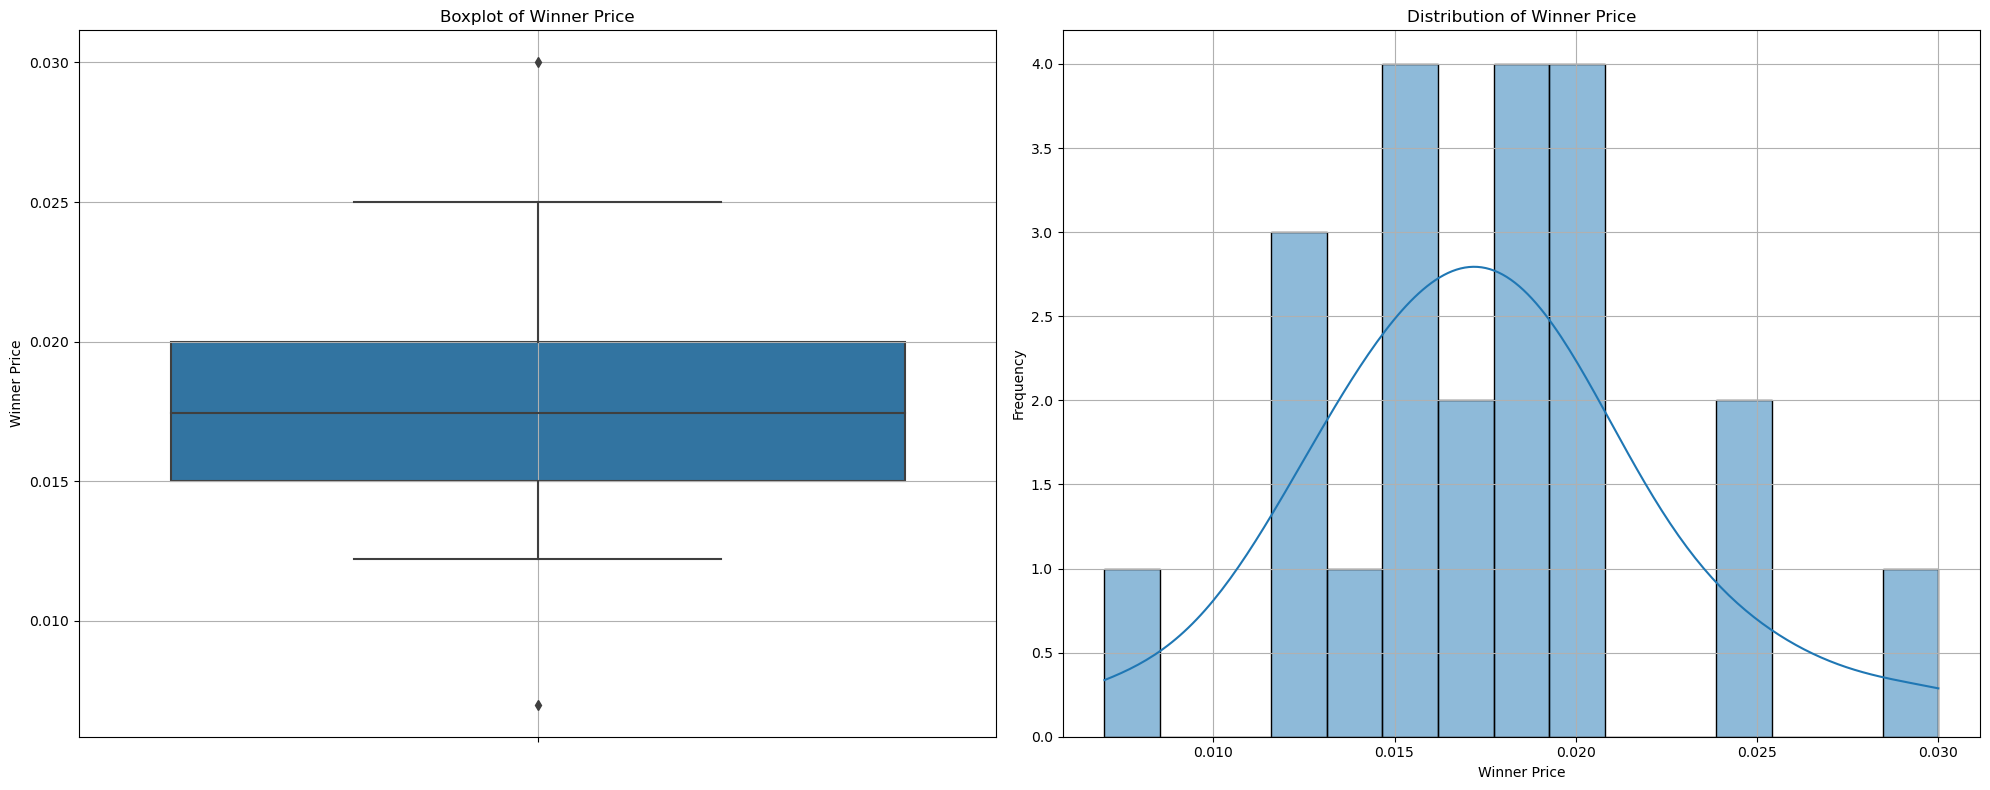

In [19]:
plt.figure(figsize=(20, 8)) 

# First subplot: Boxplot
plt.subplot(1, 2, 1)  
sns.boxplot(y=data_clean_Trimming['winner_price'])
plt.title('Boxplot of Winner Price')
plt.ylabel('Winner Price')
plt.grid(True)

# Second subplot: Histogram with KDE
plt.subplot(1, 2, 2)  
sns.histplot(data_clean_Trimming['winner_price'], kde=True, bins=15)
plt.title('Distribution of Winner Price')
plt.xlabel('Winner Price')
plt.ylabel('Frequency')
plt.grid(True)

# Show the entire figure with both plots
plt.tight_layout()  # Adjusts subplots to give some padding and prevent overlap
plt.show()

>>  ### Using IQR - Capping


Sometimes deleting data due to outliers can lead to the loss of other useful features, so using the capping method may be a preferable alternative.

In [21]:
# Capping outliers
data_clean_Capping = data['winner_price'].apply(
    lambda x: max(min(x, upper_bound), lower_bound)
)

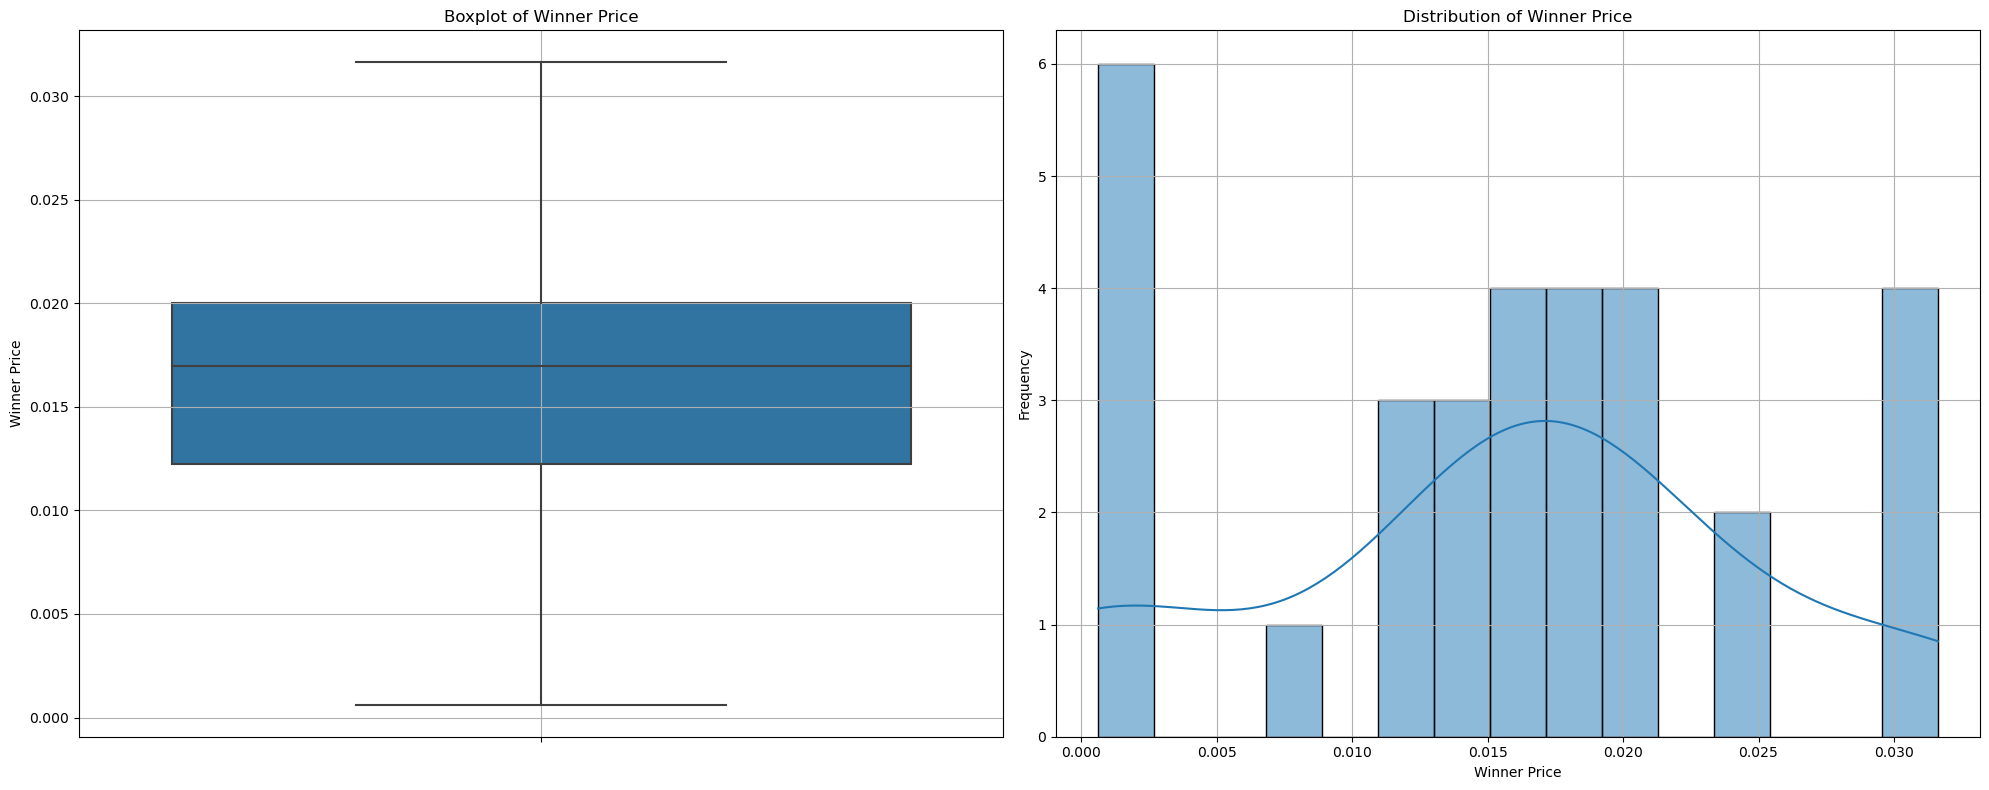

In [23]:
plt.figure(figsize=(20, 8))  

# First subplot: Boxplot
plt.subplot(1, 2, 1)  
sns.boxplot(y=data_clean_Capping)
plt.title('Boxplot of Winner Price')
plt.ylabel('Winner Price')
plt.grid(True)

# Second subplot: Histogram with KDE
plt.subplot(1, 2, 2)  
sns.histplot(data_clean_Capping, kde=True, bins=15)
plt.title('Distribution of Winner Price')
plt.xlabel('Winner Price')
plt.ylabel('Frequency')
plt.grid(True)

# Show the entire figure with both plots
plt.tight_layout()  
plt.show()

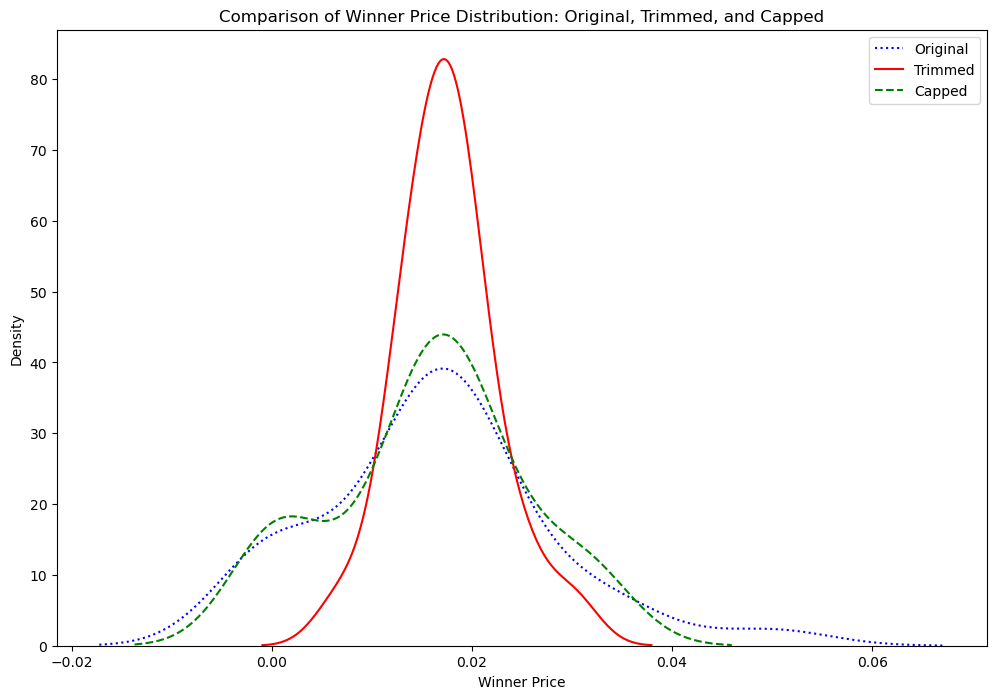

In [32]:

plt.figure(figsize=(12, 8))
sns.kdeplot(data['winner_price'], label='Original', color="blue", linestyle=':')
sns.kdeplot(data_clean_Trimming['winner_price'], label='Trimmed', color="red")
sns.kdeplot(data['capped_winner_price'], label='Capped', color="green", linestyle='--')

plt.title('Comparison of Winner Price Distribution: Original, Trimmed, and Capped')
plt.xlabel('Winner Price')
plt.ylabel('Density')
plt.legend()
plt.show()

The comparison between the original, trimmed, and capped distributions of winner_price illustrates the effects of each outlier handling method. Trimming removes outliers, resulting in a more compact and possibly normal distribution, ideal for analyses sensitive to extreme values. In contrast, capping truncates the distribution's tails and introduces peaks at the bounds, maintaining data integrity but potentially affecting natural distribution interpretations. Each method suits different analytical needs; trimming is useful for reducing data variability, while capping preserves dataset size, beneficial when data loss is a concern.

# Question B

## What manual tasks would you perform?

#### Sample Review:
Even after applying automated cleaning procedures, manually review a random sample of the data to ensure that the data looks reasonable and the automated steps have worked as intended.
#### Anomaly Investigation: 
When outliers are detected by automated methods, manually inspect these cases to determine if they are true anomalies or legitimate extreme values. This often requires deeper business knowledge or additional context that might not be captured in the data alone.

# Question C

## How would you improve this process long term and how would you build your roadmap?

#### Automation of Data Cleansing:
    Develop and refine scripts and algorithms that automate the steps outlined above, reducing the need for manual intervention and increasing efficiency.
#### Regular Audits and Updates:
    Set up a schedule for regular audits of the data cleansing process to ensure its ongoing relevance and effectiveness as the data evolves.
#### Integration with Data Sources:
    Work towards tighter integration with data sources to improve data accuracy at the point of entry. This could involve improving data collection methods or initial data validation steps.
#### Scaling the Process:
    As the process scales from a few SKUs to hundreds or thousands, consider leveraging cloud-based data platforms that can handle large volumes of data and provide powerful tools for data processing and machine learning.
#### Use of Advanced Tools:
    Adopt more sophisticated data quality and anomaly detection tools that can scale with increasing data size and complexity.

condensed version of the roadmap for enhancing your data cleansing processes:

### Phase 1: Planning and Setup
#### Define Objectives: 
Set clear goals for data quality and identify key data sources.
#### Tool Selection:
Choose appropriate tools for data cleansing and integration that are scalable.
### Phase 2: Development and Integration
#### Develop Automation Scripts:
Write scripts to automate data cleansing tasks like error correction and data standardization.
#### Integrate with Data Sources: 
Enhance data accuracy at entry points and streamline data collection methods.
### Phase 3: Deployment and Scaling
#### Deploy Automation Tools:
Implement the automated data cleansing scripts.
#### Initial Scaling:
Use cloud platforms for handling larger datasets and start scaling the processes.
### Phase 4: Maintenance and Auditing
#### Regular Audits:
Establish a schedule for regular audits to evaluate the process effectiveness.
#### Update Processes: 
Refine and update tools and scripts based on audit findings.
### Phase 5: Advanced Scaling and Sophistication
#### Adopt Advanced Tools:
Integrate sophisticated data quality and anomaly detection tools.
#### Comprehensive Scaling:
Expand cloud usage to support larger data volumes and complexity.
### Phase 6: Continuous Improvement
#### Monitor and Adapt:
Continuously monitor processes and update strategies based on new technology and business needs.

This streamlined roadmap focuses on critical steps that ensure effective data cleansing and management, leading to improved data quality and operational efficiency.

# Question D

## Would you change anything if you would need to scale this process from a few SKU's to hundreds and thousands.


Considering the substantial volume of information we manage, it is advisable to avoid aggregating multiple data points within single fields (e.g., combining different attributes in fields like participants, participants_price'). This approach can complicate the use of methods such as one-hot encoding, which in turn increases both the total amount of information and the number of features. It is recommended to structure data by ensuring that each attribute is stored in distinct fields to maintain clarity and efficiency in data management.